In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Load the California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [37]:
# Display statistical information about the dataset
print("\nStatistical Information about Features:")
print(X.describe())


Statistical Information about Features:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000

In [6]:
# Check for missing values
print("\nMissing Values:")
print(X.isnull().sum())


Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize features (optional but often beneficial for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Linear Regression
# Implement Linear Regression model
linear_model = LinearRegression()

In [11]:
# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
# Make predictions
linear_predictions = linear_model.predict(X_test_scaled)

In [23]:
# Evaluate performance
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

In [24]:
# Artificial Neural Network (ANN)
# Implement ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

In [27]:
# Make predictions
ann_predictions = model.predict(X_test_scaled).flatten()

129/129 [==============================] - 0s 2ms/step


In [28]:
# Evaluate performance
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)

In [29]:
# Comparison and Analysis
# Compare performance metrics
print(f"\nLinear Regression - Mean Squared Error: {linear_mse}, R2 Score: {linear_r2}")
print(f"Artificial Neural Network - Mean Squared Error: {ann_mse}, R2 Score: {ann_r2}")


Linear Regression - Mean Squared Error: 0.5558915986952444, R2 Score: 0.5757877060324508
Artificial Neural Network - Mean Squared Error: 0.317472253667253, R2 Score: 0.7577304040655846


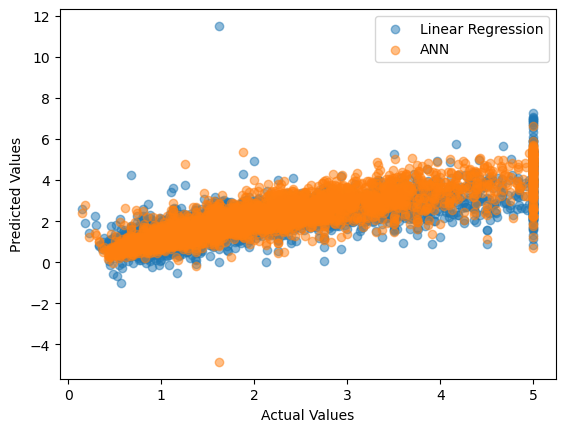

In [30]:
# Visualization
# Scatter plot of actual vs predicted values
plt.scatter(y_test, linear_predictions, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, ann_predictions, label='ANN', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [31]:
# Model architectures visualization (summary)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                576       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
